In [2]:
import torch
import torch.autograd as autograd         # computation graph
from torch import Tensor                  # tensor node in the computation graph
import torch.nn as nn                     # neural networks
import torch.optim as optim               # optimizers e.g. gradient descent, ADAM, etc.

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker
from torch.nn.parameter import Parameter

import numpy as np
import time
from pyDOE import lhs         #Latin Hypercube Sampling
import scipy.io

from smt.sampling_methods import LHS
from scipy.io import savemat

#Set default dtype to float32
torch.set_default_dtype(torch.float)

#PyTorch random number generator
torch.manual_seed(1234)

# Random number generators in other libraries
np.random.seed(1234)

device = torch.device('cpu')

print(device)
from scipy.integrate import odeint
import matplotlib.pyplot as plt

if device == 'cuda': 
    print(torch.cuda.get_device_name())

cpu


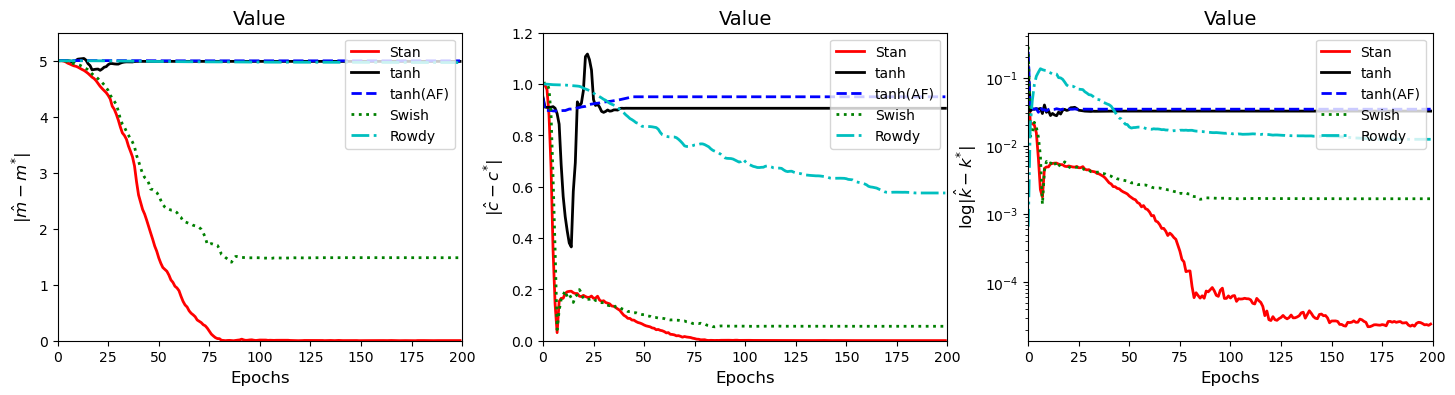

In [4]:
folder_base = './Spring Mass/'

fig, ax = plt.subplots(1,3)

max_steps = 200
prob_name = "1D_SMD_"

levels = ["_low","_medium","_high"]
all_labels = ['Stan','tanh','tanh(AF)','Swish','Rowdy']
all_colors = ['r','k','b--','g:','c-.']

folders = ['stan/','tanh/','atanh/','swish/','rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']

level = "_high"

for i in range(5):
    dat = scipy.io.loadmat(folder_base + folders[i]+prob_name+algo_names[i]+level+'.mat')
    m =  dat['m']
    c =  dat['c']
    k =  dat['k']

    m = np.nanmean(m,axis = 0)
    c = np.nanmean(c,axis = 0)
    k = np.nanmean(k,axis = 0)
    
    ax[0].plot(range(0,max_steps),np.abs(m-5),all_colors[i],linewidth = 2,label = all_labels[i])
    ax[1].plot(range(0,max_steps),np.abs(c-1),all_colors[i],linewidth = 2,label = all_labels[i])
    ax[2].plot(range(0,max_steps),np.abs(k-0.01),all_colors[i],linewidth = 2,label = all_labels[i])
    
    ax[0].set_ylabel('$|\hat{m}-m^{*}$|',fontsize=12,alpha = 1)
    ax[1].set_ylabel('$|\hat{c}-c^{*}$|',fontsize=12,alpha = 1)
    ax[2].set_ylabel('$\log|\hat{k}-k^{*}$|',fontsize=12,alpha = 1)
    
    ax[2].set_yscale('log')
    
    ax[0].set_ylim([0,5.5])
    ax[1].set_ylim([0,1.2])
    
    
for i in range(3):    
    ax[i].set_title('Value', fontsize=14)
    # ax[i].set_yscale('log')
    ax[i].figure.set_size_inches(10, 4)
    ax[i].legend(loc = 1)
    ax[i].set_xlim([0,max_steps])
    ax[i].set_xlabel('Epochs',fontsize=12,alpha = 1)
    # ax[i].set_aspect(10)

    
# ax.set_xticks(tick_locs)
# ax.set_xticklabels(all_labels,rotation = 90,fontsize = 14)
# ax.set_ylim([0,1.1])
# # ax.set_yscale('log')
# ax.text(tick_locs[0]+0.65,-0.21,'(Proposed)',rotation = 90,fontsize = 12)
# ax.set_title('Klein-Gordon Equation', fontsize=14)
# ax.set_ylabel('Relative Error',fontsize=12,alpha = 1)

# # ax.set_aspect(10)
# ax.figure.set_size_inches(21, 5)
fig.subplots_adjust(right = 1.5)

plt.savefig('mck_'+level+'.png', format='png',pad_inches=0, bbox_inches='tight',transparent=True)
plt.savefig('mck_'+level+'.pdf', format='pdf',pad_inches=0, bbox_inches='tight',transparent=True)

In [57]:
level = "_high"
for i in range(5):
    dat = scipy.io.loadmat(folder_base + folders[i]+prob_name+algo_names[i]+level+'.mat')
    m =  dat['m']
    c =  dat['c']
    k =  dat['k']

    m = np.nanmean(m,axis = 0)
    c = np.nanmean(c,axis = 0)
    k = np.nanmean(k,axis = 0)
    
    print(m[-1],c[-1],k[-1])

4.9973373 1.0005301 0.009975603
0.011932523 0.094363295 0.042233948
0.0018465504 0.049611337 0.044378567
3.5176473 1.0562767 0.008324973
0.032134924 0.42436886 0.022448098
